In [1]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
#input_file = "../dataset_/movie_metadata.csv"
input_file = "../dataset_/no_imdb_names-count_cat-tf_184f.csv"

In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [3]:
f = pd.read_csv(input_file)
data=DataFrame(f)

# Ignore 'gross' equals to 0
data['worldwide_gross'].replace(0,np.nan,inplace=True)

# Ignore na data? Imputation methods?
data = data.dropna()
data = data.drop('Unnamed: 0',1)

data.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,...,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4.435000e+03,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.0,4435.0,4435.000000,4435.000000
mean,7157.491319,1809.685231,687.895152,0.362570,10567.263134,777.843517,0.220519,108.698985,3.295081e+07,2002.328749,...,0.008863,0.000902,0.073883,0.158428,0.221608,0.000113,0.0,0.0,0.000113,0.005571
std,15729.577953,4221.614839,1714.914090,0.480796,18891.863351,3008.650726,0.414643,20.701637,4.077419e+07,12.418491,...,0.066291,0.021219,0.177717,0.233145,0.249355,0.007508,0.0,0.0,0.007508,0.052802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.100000e+03,1920.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,676.500000,333.500000,167.000000,0.000000,1665.000000,9.000000,0.000000,95.000000,6.500000e+06,1999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1000.000000,643.000000,402.000000,0.000000,3509.000000,58.000000,0.000000,105.000000,2.000000e+07,2005.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,12000.000000,960.000000,662.000000,1.000000,15278.500000,222.000000,0.000000,119.000000,4.200000e+07,2010.000000,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.0,0.000000,0.000000
max,713000.000000,137000.000000,23000.000000,1.000000,729779.000000,33000.000000,1.000000,227.000000,4.250000e+08,2017.000000,...,0.577350,0.500000,0.707107,0.707107,0.707107,0.500000,0.0,0.0,0.500000,0.707107


In [4]:
data.head(10)

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,...,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
0,1000,942.0,862,1,4859,7000,0,178,425000000,2009.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,29000,14000.0,787,1,45239,7000,0,194,200000000,1997.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,3000.0,878,1,8694,367,0,124,215000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,26000,23000.0,14000,0,79155,0,0,140,190000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,26000,21000.0,19000,0,97000,0,0,141,250000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
5,10000,577.0,175,1,11064,0,0,130,125000000,2011.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,1000,525.0,490,0,2601,69,0,102,150000000,2013.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21000,3000.0,1000,0,25774,0,0,195,200000000,2013.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
8,7000,4000.0,1000,1,13636,22,0,91,74000000,2015.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21000,19000.0,11000,0,66820,96,0,147,250000000,2016.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
### Explore the most important features
[ c for c in data.columns]

#data['imdb_score'].hist(bins=10)

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'blockbuster_month',
 'cast_total_facebook_likes',
 'director_facebook_likes',
 'dump_month',
 'duration',
 'production_budget',
 'title_year',
 'worldwide_gross',
 'adamsandler',
 'adamscott',
 'alpacino',
 'angelinajolie',
 'annakendrick',
 'annehathaway',
 'anthonyhopkins',
 'anthonymackie',
 'antonyelchin',
 'billcobbs',
 'billmurray',
 'bobhoskins',
 'bradleycooper',
 'bradpitt',
 'briandepalma',
 'brucegreenwood',
 'brucemcgill',
 'brucewillis',
 'catherineohara',
 'channingtatum',
 'charlesdance',
 'chazzpalminteri',
 'cheechmarin',
 'chlo',
 'chrisevans',
 'christianbale',
 'cliftoncollinsjr',
 'clinteastwood',
 'colinfirth',
 'dennisquaid',
 'denzelwashington',
 'dianekeaton',
 'djimonhounsou',
 'doncheadle',
 'dwaynejohnson',
 'emmastone',
 'franklangella',
 'garyoldman',
 'gerardbutler',
 'gracemoretz',
 'harrisonford',
 'helenmirren',
 'hughjackman',
 'jadapinkettsmith',
 'jakegyllenhaal',
 'j

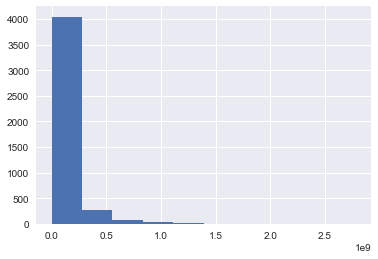

In [6]:
data['worldwide_gross'].hist()

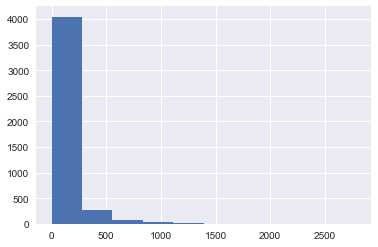

In [7]:
### Add posssibly usefull features

data['gross_millions'] = data['worldwide_gross']/1E6
data['gross_millions'].hist()

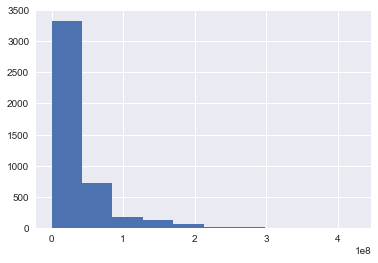

In [8]:
data['production_budget'].hist()

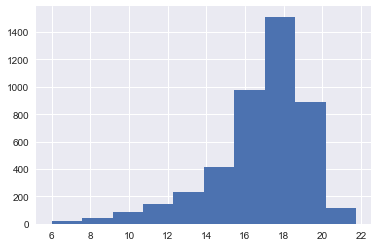

In [9]:
data['gross_log'] = np.log(data['worldwide_gross'])
data['gross_log'].hist()

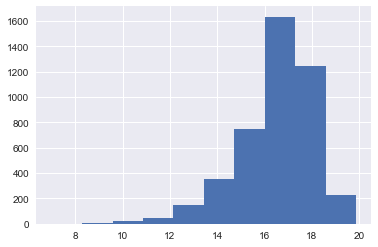

In [10]:
data['budget_log'] = np.log(data['production_budget'])
data['budget_log'].hist()  ## Consider applying log in the budget too as it has outlayers

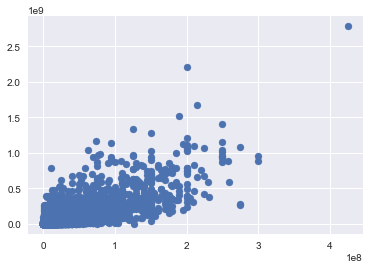

In [11]:
plt.scatter(data['production_budget'],data['worldwide_gross'])
# This could be useful!

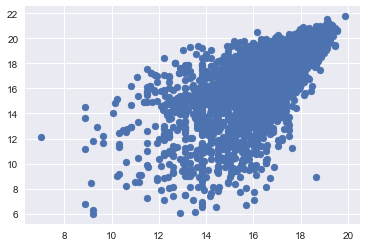

In [12]:
plt.scatter(data['budget_log'],data['gross_log'])

In [13]:
### Use gross_classes
def discretize_gross(row):
    if row['worldwide_gross'] < 1e7: return 1
    elif row['worldwide_gross'] < 3e8: return 2
    else: return 3

data['gross_class'] = data.apply(discretize_gross, axis=1)
data['gross_class'].astype('category')

# How many movies per gross class?
grouped = data[['worldwide_gross','gross_class']].groupby('gross_class')
print("Movies per gross class")
print(grouped.count())

Movies per gross class
             worldwide_gross
gross_class                 
1                       1242
2                       2840
3                        353


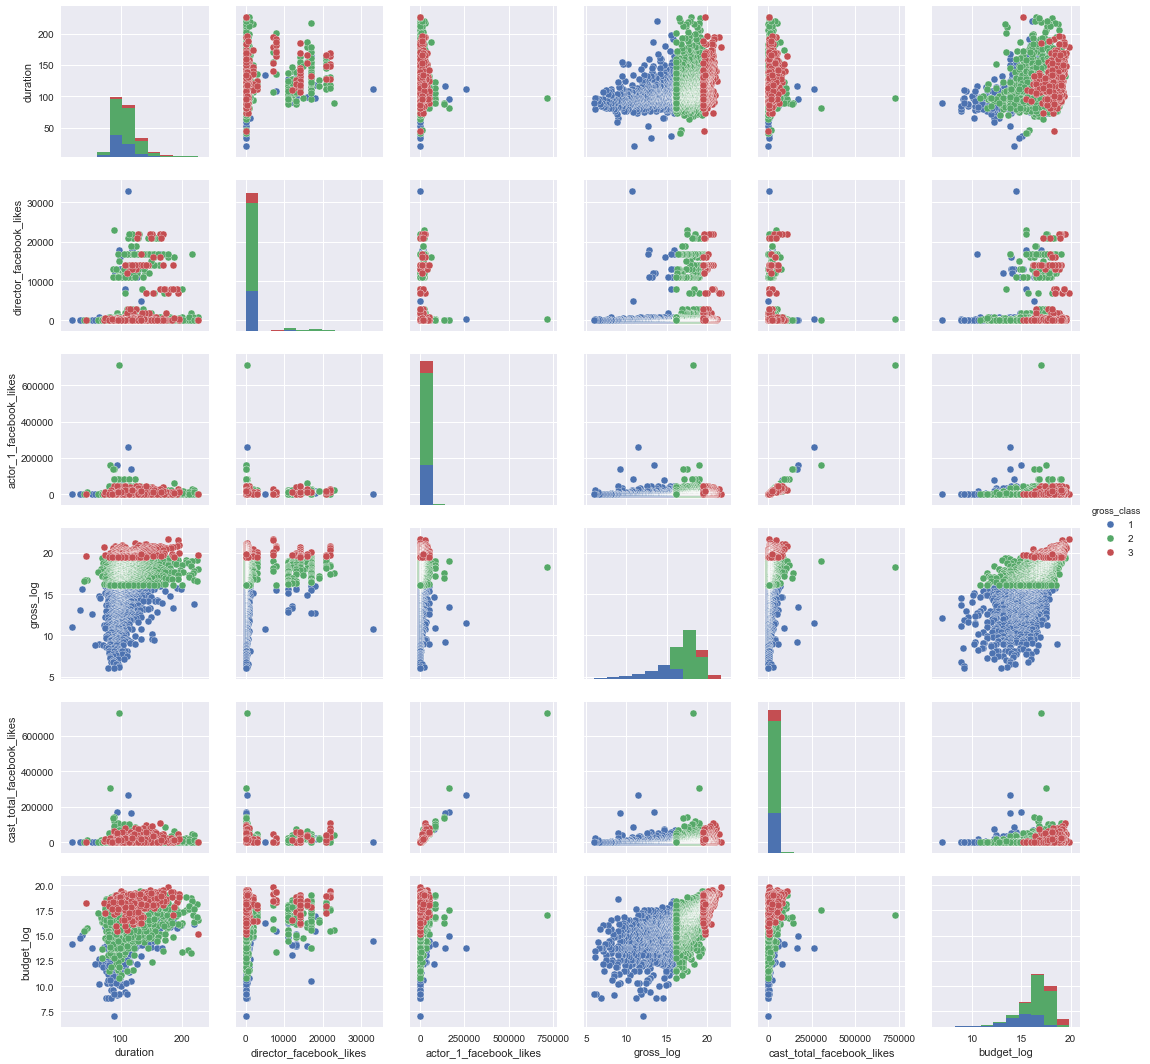

In [14]:
import seaborn as sns
sns.set()

relevant_features = ['duration', 'director_facebook_likes', 
                     'actor_1_facebook_likes', 
                     'gross_log', 'cast_total_facebook_likes',
                     'budget_log' 
                    ]

sns.pairplot(data, vars=relevant_features, hue='gross_class')

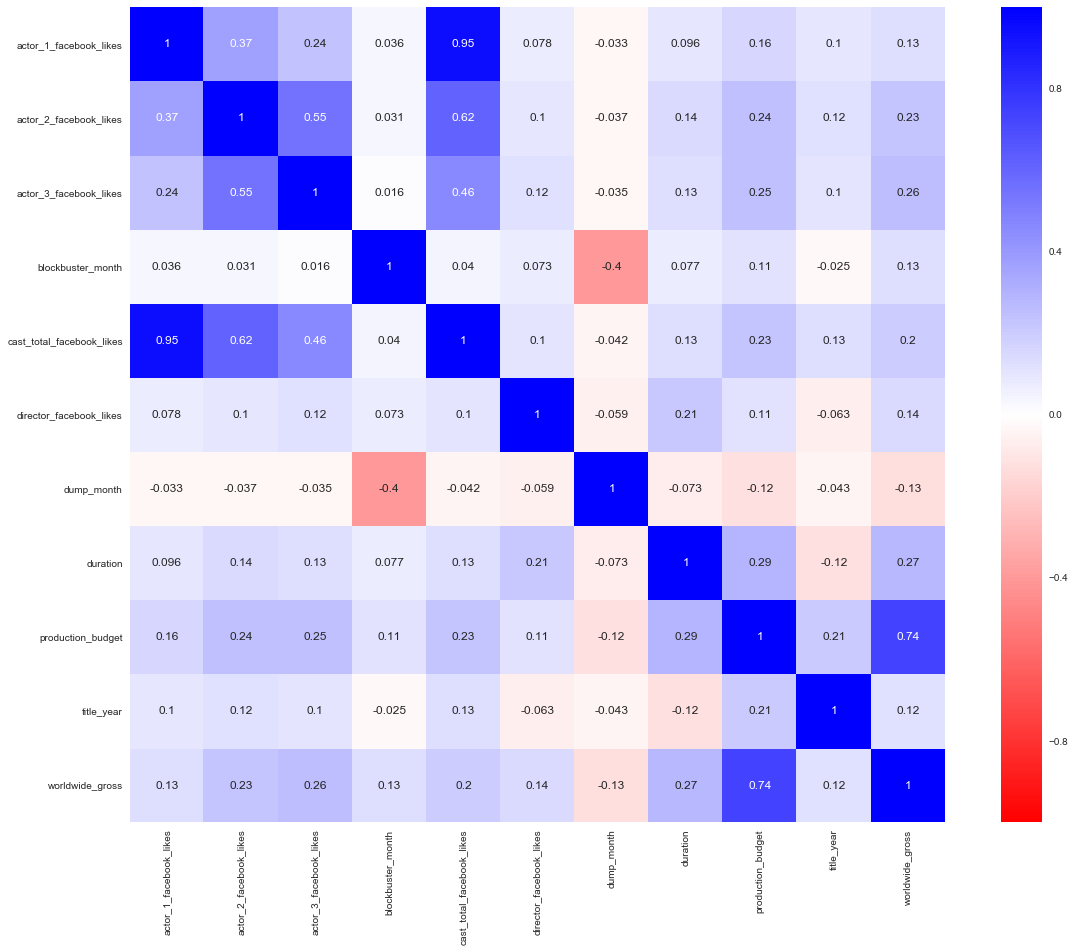

In [15]:
### Correlation matrix

corr_mat=data[['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'blockbuster_month',
 'cast_total_facebook_likes',
 'director_facebook_likes',
 'dump_month',
 'duration',
 'production_budget',
 'title_year',
 'worldwide_gross']].corr(method='pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='bwr_r')

In [16]:
### Normalize data
### Set predictors
### Set target

X=StandardScaler().fit_transform(data)
y=np.array(data['worldwide_gross'])

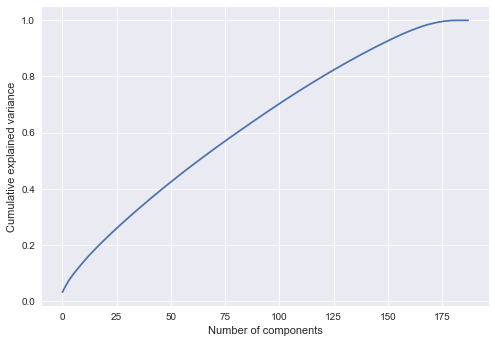

In [17]:
### Principal component analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

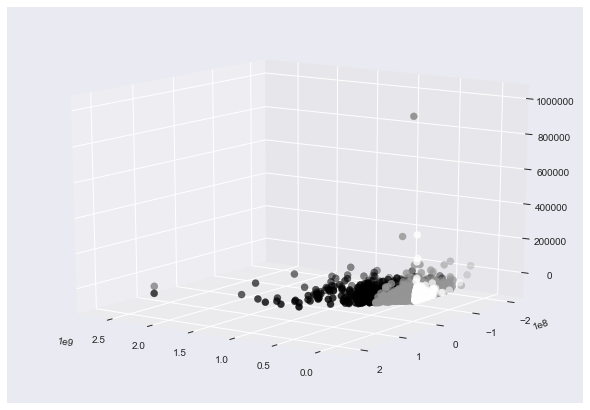

In [21]:
# 3D PCA-based plot

from mpl_toolkits.mplot3d import Axes3D

def create_2d_plot(data_2d, labels):
    plt.figure()
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels)

def create_3d_plot(data_3d, labels):
    fig = plt.figure()
    plt.clf()
    ax = Axes3D(fig, elev=15, azim=125)
    plt.cla()
    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], 'o', s=50, c=labels)
    plt.show()


# 3D-plot
data_3d = PCA(n_components=3).fit_transform(data)
create_3d_plot(data_3d, data['gross_class'])


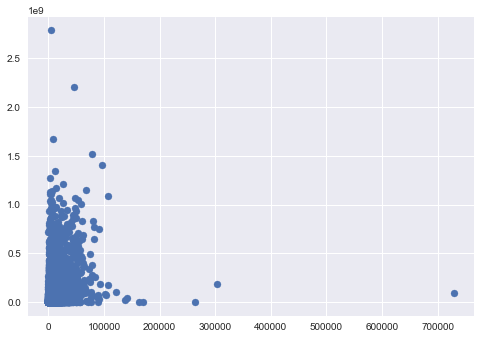

In [25]:
# Gross versus facebook popularity
plt.scatter(data['cast_total_facebook_likes'],data['worldwide_gross'])

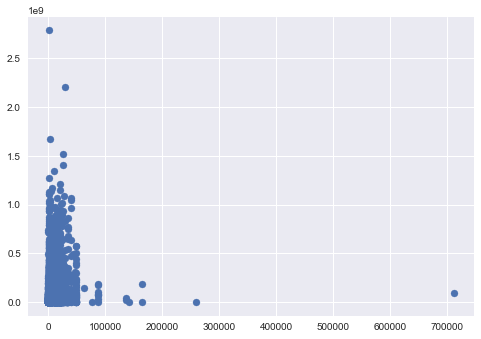

In [23]:
plt.scatter(data['actor_1_facebook_likes'],data['worldwide_gross'])